<div class="alert alert-block alert-info" style="margin-top: 20px">
<br><br>     
<p style="text-align: center;"> <font size="18"><b>Analysis of my running performance </b></font></p>
<br><br>  
</div>

# ✔️ Introduction

The purpose of this notebook is to present analysis of my running performance and create a machine learning model which will be able to predict the average tempo ( seconds / kilometer ) when given the distance and elevation gain. 

The notebook consists of three main parts - <b>Data Wrangling</b> - where I clean the dataset and make it ready for further steps, <b>EDA which stands for Exploratory Data Analysis</b> - where I take a deeper look into data and try to have a good overview on my activities, and finaly - <b>building machine larning models</b> based on the cleaned and understood data.

Data for my activities has been collected from Garmin watch, which I always use  while doing sport activities. Thanks to Garmin Connect app I was able to extract it in the .CSV format. 

### Import libraries

In [1]:
# numpy and pandas for data wrangling
import numpy as np
import pandas as pd

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# turn-off warnings
import warnings
warnings.filterwarnings('ignore')

### Pandas display option

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('precision', 2)

### Loading data

In [3]:
df_w_oryginal = pd.read_csv('weather.csv')
df_oryginal = pd.read_csv('Activities.csv')

In [4]:
df_oryginal.head(3)

,Typ aktywności,Data,Ulubiony,Tytuł,Dystans,Kalorie,Czas,Średnie tętno,Maksymalne tętno,Aerobowy TE,Średni rytm biegu,Maksymalny rytm biegu,Średnie tempo,Najlepsze tempo,Całkowity wznios,Całkowity spadek,Średnia długość kroku,Średnie odchylenie do długości,Średnie odchylenie pionowe,Training Stress Score® (TSS®),Trudność,Płynność,Czas nurkowania,Minimalna temperatura,Przerwa powierzchniowa,Dekompresja,Czas najlepszego okrążenia,Liczba okrążeń,Maksymalna temperatura,Czas ruchu,Upłynęło czasu,Minimalna wysokość,Maksymalna wysokość
0,Bieganie,2021-10-29 17:04:38,False,Myślenice Bieganie,6.08,455,00:31:26,--,--,--,168,176,5:10,4:08,102,123,1.15,0.0,0.0,0.0,0.0,0.0,0:00,0.0,0:00,Nie,00:27.86,7,0.0,00:31:24,00:32:30,261,353
1,Bieganie,2021-10-08 16:34:46,False,Myślenice Bieganie,6.04,451,00:30:19,--,--,--,170,181,5:01,4:16,104,121,1.17,0.0,0.0,0.0,0.0,0.0,0:00,0.0,0:00,Nie,00:10.33,7,0.0,00:30:17,00:31:26,261,353
2,Bieganie,2021-10-07 18:20:34,False,Siepraw Bieganie,4.46,335,00:23:19,--,--,--,169,192,5:14,4:27,89,93,1.13,0.0,0.0,0.0,0.0,0.0,0:00,0.0,0:00,Nie,02:31.13,5,0.0,00:23:14,00:23:59,261,353


In [5]:
# due to to incorrect data from my Garmin Connect, I need to remove rows with 00:00:00 moving time

df_oryginal = df_oryginal.drop([5,6,7,8,9,10,11], axis = 0)

# ✔️ Data wrangling

### Part 1. Activities

<br>
First of all, I want to check what type of data I'll be dealing with, what needs to be changed and which columns won't be needed.
<br><br>

In [6]:
df_oryginal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 181
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Typ aktywności                  175 non-null    object 
 1   Data                            175 non-null    object 
 2   Ulubiony                        175 non-null    bool   
 3   Tytuł                           175 non-null    object 
 4   Dystans                         175 non-null    float64
 5   Kalorie                         175 non-null    object 
 6   Czas                            175 non-null    object 
 7   Średnie tętno                   175 non-null    object 
 8   Maksymalne tętno                175 non-null    object 
 9   Aerobowy TE                     175 non-null    object 
 10  Średni rytm biegu               175 non-null    int64  
 11  Maksymalny rytm biegu           175 non-null    int64  
 12  Średnie tempo                   175 

<br>
This column will be needed on that step. They are in Polish but I'm going to change their names into English for better understanding. 
<br><br>

In [7]:
# Data -> Date
# Dystans -> Distance
# Średni rytm biegu -> Average running rythm
# Średnie tempo -> Average tempo
# Całkowity wznios -> Elevation gain
# Czas ruchu - > Moving time
# Upłynęło czasu -> Elapsed time

In [8]:
# creating new df only with required columns
df = df_oryginal[['Data', 'Dystans', 'Średni rytm biegu', 'Średnie tempo', 'Całkowity wznios', 'Czas ruchu', 'Upłynęło czasu']]

In [9]:
# changing names to English
df = df.rename(columns = {'Data': 'Date', 'Dystans': 'Distance', 'Średni rytm biegu': 'Avg_running_rythm',
                          'Średnie tempo': 'Avg_tempo', 'Całkowity wznios': 'Elevation_gain',
                          'Czas ruchu': 'Moving_time', 'Upłynęło czasu': 'Elapsed_time'})

In [10]:
# changing 'Elevation_gain' type to int32
df['Elevation_gain_2'] = df.Elevation_gain.str.extract('(\d+)', expand = False)
df = df.astype({'Elevation_gain_2': 'float64'})
df.drop('Elevation_gain', axis = 1, inplace = True)
df.rename(columns={'Elevation_gain_2': 'Elevation_gain'}, inplace = True)
df['Elevation_gain'].replace(np.nan, 0, inplace = True)

In [11]:
# changing 'Avg_running_rythm' type to float64
df = df.astype({'Avg_running_rythm': 'float64'})

In [12]:
df.head()

,Date,Distance,Avg_running_rythm,Avg_tempo,Moving_time,Elapsed_time,Elevation_gain
0,2021-10-29 17:04:38,6.08,168.0,5:10,00:31:24,00:32:30,102.0
1,2021-10-08 16:34:46,6.04,170.0,5:01,00:30:17,00:31:26,104.0
2,2021-10-07 18:20:34,4.46,169.0,5:14,00:23:14,00:23:59,89.0
3,2021-10-07 18:09:48,1.17,168.0,5:06,00:05:56.7,00:06:01.2,0.0
4,2021-09-24 17:42:46,5.02,175.0,4:24,00:22:03,00:22:07,2.0


<br>
Now the DataFrame structure looks ok. I will once again check what kind of data type I'm dealing with and I will go to the next step.
<br><br>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 181
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               175 non-null    object 
 1   Distance           175 non-null    float64
 2   Avg_running_rythm  175 non-null    float64
 3   Avg_tempo          175 non-null    object 
 4   Moving_time        175 non-null    object 
 5   Elapsed_time       175 non-null    object 
 6   Elevation_gain     175 non-null    float64
dtypes: float64(3), object(4)
memory usage: 10.9+ KB


At first, I will convert date to the proper format. I'm interested only in date, therefore I will skip the time part.

In [14]:
#  because my 'Date' column isn't in the proper date format, I will first extract the 'yyyy-mm-dd' using RegExr,
# and than, based on the output, I'll create correct dates.

df['Dates'] = df.Date.str.extract('(\d{4}.\d*.\d*)', expand = False)
df['Date'] = pd.to_datetime(df['Dates'])

print(df['Date'].dtype)

datetime64[ns]


As we can see above, column 'Date' has been correctly changed to datetime64 type. I can remove 'Dates' column, as it won't be needed anymore. 

In [15]:
df.drop('Dates', axis = 1, inplace = True)

<br>In the next step I will convert time showing in 'Moving_time' and 'Elapsed_time' columns into seconds. This is required for further calculations. Doing so is impossible in the format that data is now. I will also remove column 'Avg_temp'. It will be recreated later based on converted values ('Moving_time', 'Elapsed_time')
<br><br>

In [16]:
# extracting only correct values as some of them were in the format like that HH:MM:SS.MS

df['Moving_time'] = df.Moving_time.str.extract('(\d{2}\:\d{2}\:\d{2})', expand = False)
df['Elapsed_time'] = df.Elapsed_time.str.extract('(\d{2}\:\d{2}\:\d{2})', expand = False)

In [17]:
# converting values to datetime format

df['Moving_time'] = pd.to_datetime(df['Moving_time'], format = '%H:%M:%S').dt.time
df['Elapsed_time'] = pd.to_datetime(df['Elapsed_time'], format = '%H:%M:%S').dt.time

<br>Function below will convert given timeformat into seconds
<br><br>

In [18]:
def total_seconds_in_time(t):
    from datetime import timedelta
    return timedelta(hours=t.hour, minutes=t.minute, seconds=t.second) / timedelta(seconds=1)

In [19]:
# creating columns with values shown as seconds
df['Moving_time_in_seconds'] = df['Moving_time'].apply(lambda x: total_seconds_in_time(x))
df['Elapsed_time_in_seconds'] = df['Elapsed_time'].apply(lambda x: total_seconds_in_time(x))

<br>For now, I will remove 'Moving_time' and 'Elapsed_time' columns in order to operate on one value format.
<br><br>

In [20]:
df.drop(['Moving_time', 'Elapsed_time'], axis = 1, inplace= True )

In [21]:
# recreating 'Avg_tempo' coulumn with seconds as values

df = df.drop('Avg_tempo', axis = 1)
df['Avg_tempo_in_seconds'] = df['Moving_time_in_seconds'] / df['Distance']

<br>I would also like to check what was the rest time and percentage of it in total activity time.
<br><br>

In [22]:
df['Rest_time_in_seconds'] = df['Elapsed_time_in_seconds'] - df['Moving_time_in_seconds']
df['Rest_percentage'] = df['Rest_time_in_seconds'] / df['Elapsed_time_in_seconds'] * 100

In [23]:
df.head(3)

,Date,Distance,Avg_running_rythm,Elevation_gain,Moving_time_in_seconds,Elapsed_time_in_seconds,Avg_tempo_in_seconds,Rest_time_in_seconds,Rest_percentage
0,2021-10-29,6.08,168.0,102.0,1884.0,1950.0,309.87,66.0,3.38
1,2021-10-08,6.04,170.0,104.0,1817.0,1886.0,300.83,69.0,3.66
2,2021-10-07,4.46,169.0,89.0,1394.0,1439.0,312.56,45.0,3.13


<br>Now, when I recalculated all the columns, I want to categorize all my runs by their <b>distance</b> and <b>elevation gain.</b><br>
I want to divide them into <b>long (more then 10km)</b> and <b>short(<10km)</b> runs and whether they were <b>flat (up to 70m elevation gain )</b>, <b>hills (71m - 180m elevation gain )</b> or <b>mountains (> 180m elevation gain )</b>. <br><br>
To do this, I will apply below funcions which return the correct category.
</b><br>

In [24]:
def distance_category(distance):
    if distance > 10:
        return "long"
    else:
        return 'short'

In [25]:
def elevation_category(elevation):
    if elevation <= 70:
        return 'flat'
    elif elevation >= 71 and elevation < 180:
        return 'hills'
    else:
        return 'mountains'

In [26]:
df['Distance_category'] = df['Distance'].apply(lambda x: distance_category(x))

In [27]:
df['Elevation_category'] = df['Elevation_gain'].apply(lambda x: elevation_category(x))

<br>I will also add column 'year' and 'month' so I could see how my activities and results looked throughout the time. 
<br><br>

In [28]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [29]:
df['Year_month'] = df_oryginal.Data.str.extract('(\d{4}.\d{2})', expand = False)

In [30]:
df.head()

,Date,Distance,Avg_running_rythm,Elevation_gain,Moving_time_in_seconds,Elapsed_time_in_seconds,Avg_tempo_in_seconds,Rest_time_in_seconds,Rest_percentage,Distance_category,Elevation_category,Year,Month,Year_month
0,2021-10-29,6.08,168.0,102.0,1884.0,1950.0,309.87,66.0,3.38,short,hills,2021,10,2021-10
1,2021-10-08,6.04,170.0,104.0,1817.0,1886.0,300.83,69.0,3.66,short,hills,2021,10,2021-10
2,2021-10-07,4.46,169.0,89.0,1394.0,1439.0,312.56,45.0,3.13,short,hills,2021,10,2021-10
3,2021-10-07,1.17,168.0,0.0,356.0,361.0,304.27,5.0,1.39,short,flat,2021,10,2021-10
4,2021-09-24,5.02,175.0,2.0,1323.0,1327.0,263.55,4.0,0.30,short,flat,2021,9,2021-09


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 181
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     175 non-null    datetime64[ns]
 1   Distance                 175 non-null    float64       
 2   Avg_running_rythm        175 non-null    float64       
 3   Elevation_gain           175 non-null    float64       
 4   Moving_time_in_seconds   175 non-null    float64       
 5   Elapsed_time_in_seconds  175 non-null    float64       
 6   Avg_tempo_in_seconds     175 non-null    float64       
 7   Rest_time_in_seconds     175 non-null    float64       
 8   Rest_percentage          175 non-null    float64       
 9   Distance_category        175 non-null    object        
 10  Elevation_category       175 non-null    object        
 11  Year                     175 non-null    int64         
 12  Month                    175 non-nul

<br>Everything seems to look ok now. I have all the numercis values as floats64, date is in the right format and all rows are categorized. In the next step I would like to add weather data, as I wanted to examine if it has big impact on my sport performance or not. I would also like to check how much my motivation for running decreases when temperature goes down.
<br><br>

### Part 2. Weather

<br>Weather data has been downloaded from https://visualcrossing.com . I will use only Kraków as a location as the vast majority of my runs took place in that city or very close around. As in the above part, I will use Pandas library to clean the data and then join it with activities Data Frame. 
<br><br>

In [32]:
# data has already been loaded in the 'Loading data' section on top of that notebook

df_w_oryginal.head(3)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Kraków,2019-07-01,35.1,17.1,26.6,34.6,17.1,26.4,14.0,49.24,0.1,NaN,4.17,NaN,NaN,NaN,76.4,51.7,233.4,1012.7,35.5,24.3,NaN,NaN,0,NaN,2019-07-01T04:34:46,2019-07-01T20:53:06,0.99,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"12575099999,12566099999,12660099999,1191809999..."
1,Kraków,2019-07-02,26.0,18.3,22.4,26.0,18.3,22.4,13.1,58.69,0.2,NaN,4.17,NaN,NaN,NaN,83.2,34.8,275.8,1015.4,48.7,24.5,NaN,NaN,0,NaN,2019-07-02T04:35:25,2019-07-02T20:52:48,1.00,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"12575099999,12566099999,12660099999,1191809999..."
2,Kraków,2019-07-03,22.1,12.2,18.0,22.1,12.2,18.0,5.8,47.03,0.0,NaN,0.00,NaN,NaN,NaN,42.0,25.0,255.8,1019.6,25.8,27.2,NaN,NaN,0,NaN,2019-07-03T04:36:07,2019-07-03T20:52:28,0.00,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"12575099999,12566099999,12660099999,1191809999..."


<br>I'm only interested in date and temperature in above Data Frame. I will use the average temperature for each day based on tempmax and tempmin.
<br>


In [33]:
# creating new df only with required columns
df_w_oryginal['temp_avg'] = (df_w_oryginal['tempmax'] + df_w_oryginal['tempmin']) / 2
df_w = df_w_oryginal[['datetime', 'temp_avg']]

In [34]:
# I'll change columns names (datetime -> 'date' and icon -> 'conditions') and date format to the correct one

df_w = df_w.rename(columns={'datetime': 'Date', 'temp_avg': 'Temp_avg'})
df_w['Date'] = pd.to_datetime(df_w['Date'])

In [35]:
df_w.head()

,Date,Temp_avg
0,2019-07-01,26.10
1,2019-07-02,22.15
2,2019-07-03,17.15
3,2019-07-04,15.85
4,2019-07-05,16.60


In [36]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      885 non-null    datetime64[ns]
 1   Temp_avg  885 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.0 KB


<br>Final Data Frame looks good and I can go to the next step where I merge them and can start performing exploratory data analysis.
<br><br>

### Part 3. Merging data
<br><br>

In [37]:
df_all = df.merge(df_w, how='left', on='Date')

In [38]:
df_all.head()

,Date,Distance,Avg_running_rythm,Elevation_gain,Moving_time_in_seconds,Elapsed_time_in_seconds,Avg_tempo_in_seconds,Rest_time_in_seconds,Rest_percentage,Distance_category,Elevation_category,Year,Month,Year_month,Temp_avg
0,2021-10-29,6.08,168.0,102.0,1884.0,1950.0,309.87,66.0,3.38,short,hills,2021,10,2021-10,8.25
1,2021-10-08,6.04,170.0,104.0,1817.0,1886.0,300.83,69.0,3.66,short,hills,2021,10,2021-10,7.80
2,2021-10-07,4.46,169.0,89.0,1394.0,1439.0,312.56,45.0,3.13,short,hills,2021,10,2021-10,11.35
3,2021-10-07,1.17,168.0,0.0,356.0,361.0,304.27,5.0,1.39,short,flat,2021,10,2021-10,11.35
4,2021-09-24,5.02,175.0,2.0,1323.0,1327.0,263.55,4.0,0.30,short,flat,2021,9,2021-09,13.50


Data Frame is ready. I will send it to Excel as a source file for Power BI Dashboard.

In [39]:
df_all.to_excel('df_all.xlsx', index = None)

# ✔️ Exploratory Data Analysis

First, let's summarize data with Pandas function .describe() to see the general descriptive statistic.

In [40]:
df_all.describe(include='all', datetime_is_numeric =True)

,Date,Distance,Avg_running_rythm,Elevation_gain,Moving_time_in_seconds,Elapsed_time_in_seconds,Avg_tempo_in_seconds,Rest_time_in_seconds,Rest_percentage,Distance_category,Elevation_category,Year,Month,Year_month,Temp_avg
count,175,175.00,175.00,175.00,175.00,175.00,175.00,175.00,175.00,175,175,175.00,175.00,175,175.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,25,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,flat,NaN,NaN,2020-09,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129,85,NaN,NaN,17,NaN
mean,2020-06-14 15:29:49.714285824,8.10,167.51,118.07,2623.83,3239.18,319.15,615.35,13.85,NaN,NaN,2019.85,7.73,NaN,12.53
min,2019-07-01 00:00:00,1.17,116.00,0.00,356.00,361.00,249.10,0.00,0.00,NaN,NaN,2019.00,1.00,NaN,-8.00
25%,2019-11-04 12:00:00,6.04,163.00,13.50,1785.50,1918.00,283.88,67.50,3.41,NaN,NaN,2019.00,6.00,NaN,6.70
50%,2020-08-04 00:00:00,7.03,169.00,79.00,2141.00,2452.00,304.27,214.00,9.31,NaN,NaN,2020.00,8.00,NaN,13.95
75%,2020-11-05 00:00:00,10.04,173.00,128.00,3160.50,4592.00,337.56,882.00,20.12,NaN,NaN,2020.00,10.00,NaN,18.60
max,2021-10-29 00:00:00,21.39,184.00,773.00,7480.00,14498.00,672.66,7311.00,69.50,NaN,NaN,2021.00,12.00,NaN,26.10


<br>
At the beggining, I would like to check how many runs I've compleated based on their categories.
<br><br>

In [41]:
df_runs_count = df_all[['Distance_category', 'Elevation_category','Avg_tempo_in_seconds']]
df_runs_count_group = df_runs_count.groupby(['Distance_category', 'Elevation_category'], as_index=False).count()

<function matplotlib.pyplot.show(close=None, block=None)>

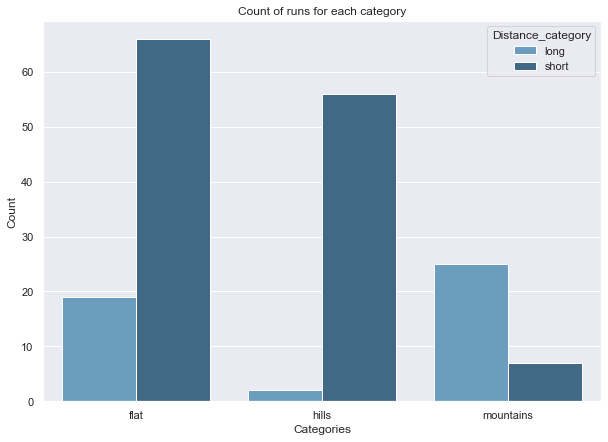

In [42]:
sns.set_theme()
fig_dims = (10, 7)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Elevation_category", y="Avg_tempo_in_seconds", hue = 'Distance_category', data=df_runs_count_group,
                 palette="Blues_d", ax=ax)
ax.set(xlabel = 'Categories', ylabel = 'Count', title = "Count of runs for each category")
plt.show

<br>
As can be seen above, most of my runs were short and in the flattened area. Not so much less took place in hilly terrain. Now let's check what was the average distance and tempo for these runs.
<br><br>

In [43]:
# function that will cover time_in_seconds into common format when it comes to displaying tempo (for example 5:31 / km)

def seconds_to_timedelta(secs):
    from datetime import timedelta
    td = timedelta(seconds=round(secs))
    minutes, seconds = divmod(td.seconds + td.days * 86400, 60)
    hours, minutes = divmod(minutes, 60)
    return '{:02d}:{:02d}'.format(minutes, seconds)


In [44]:
# creating new Data Frame for average tempo values

df_runs_mean_group = df_runs_count.groupby(['Distance_category', 'Elevation_category'], as_index=False).mean()

In [45]:
df_runs_mean_group['Avg_real_temp'] = df_runs_mean_group['Avg_tempo_in_seconds'].apply(lambda x: seconds_to_timedelta(x))
df_runs_mean_group

,Distance_category,Elevation_category,Avg_tempo_in_seconds,Avg_real_temp
0,long,flat,298.29,04:58
1,long,hills,326.36,05:26
2,long,mountains,383.49,06:23
3,short,flat,306.38,05:06
4,short,hills,309.79,05:10
5,short,mountains,339.22,05:39


<function matplotlib.pyplot.show(close=None, block=None)>

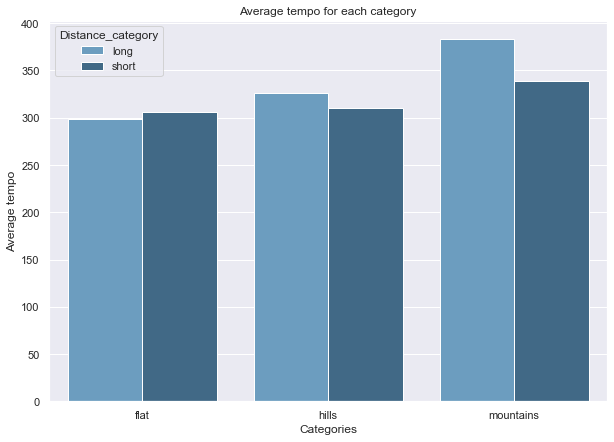

In [46]:
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Elevation_category", y="Avg_tempo_in_seconds", hue = 'Distance_category', data=df_runs_mean_group,
                 palette="Blues_d", ax=ax)
ax.set(xlabel = 'Categories', ylabel = 'Average tempo', title = "Average tempo for each category")
plt.show

<br>
The best average tempo I get on the short runs is in hilly terrain which seems interesting, as usually the flatter the road is the faster one can run. But becasue I live in the hilly area and train here on a daily basic, that make sense.
<br><br>

In [47]:
# creating new Data Frame to measure average distance

df_runs_avg_dist = df_all[['Distance_category', 'Elevation_category','Distance']]
df_avg_dist_group = df_runs_avg_dist.groupby(['Distance_category', 'Elevation_category',], as_index=False).mean()
df_avg_dist_group

,Distance_category,Elevation_category,Distance
0,long,flat,12.17
1,long,hills,12.61
2,long,mountains,12.89
3,short,flat,6.33
4,short,hills,6.48
5,short,mountains,8.22


<function matplotlib.pyplot.show(close=None, block=None)>

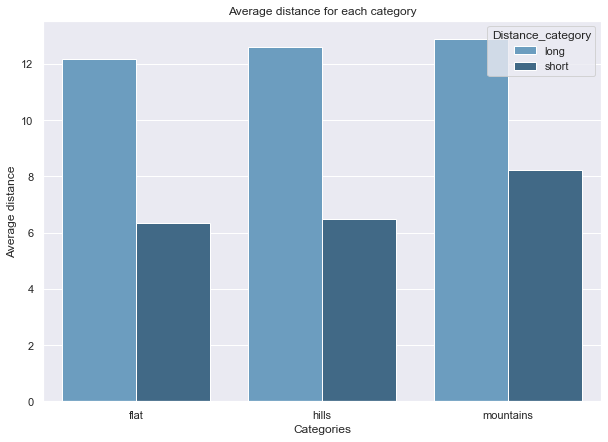

In [48]:
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Elevation_category", y="Distance", hue = 'Distance_category', data=df_avg_dist_group,
                 palette="Blues_d", ax=ax)
ax.set(xlabel = 'Categories', ylabel = 'Average distance', title = "Average distance for each category")
plt.show

<br>
Average distances are very similar in all categories. The one that stands out is for short, mountain runs. 
<br><br>
Now, let see how my average tempos looked throughtout my training years. I will split them into months.
<br>

Let's plot it on the line chart.
<br>

<function matplotlib.pyplot.show(close=None, block=None)>

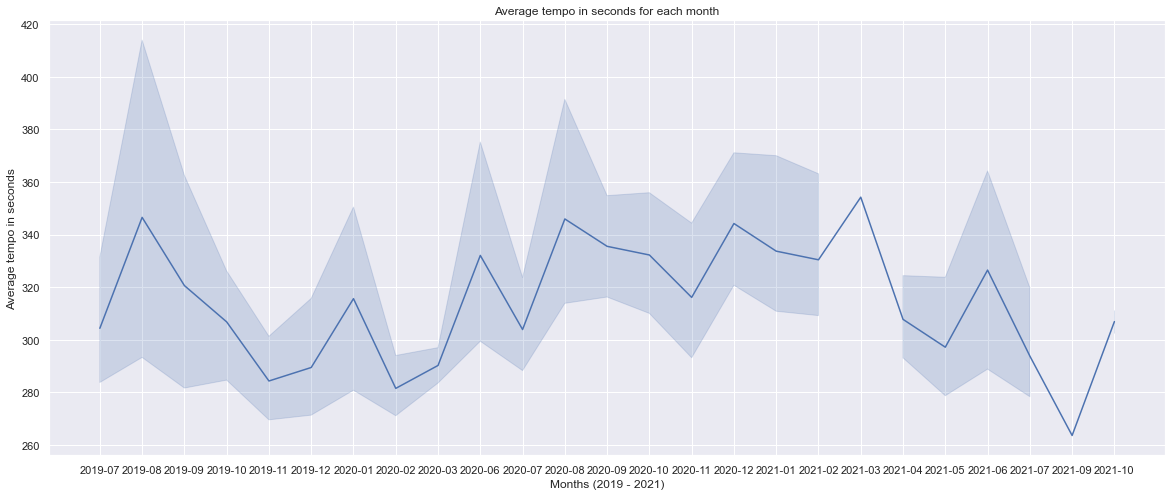

In [50]:
df_all.sort_values(by=['Date'], ascending = True, axis = 0, inplace = True)
fig,ax = plt.subplots(figsize=(20,8))
sns.lineplot(x="Year_month", y="Avg_tempo_in_seconds", data=df_all,
                 palette="Blues_d", ax=ax)
ax.set(xlabel = 'Months (2019 - 2021)', ylabel = 'Average tempo in seconds', title = "Average tempo in seconds for each month")
plt.show

<br>On the above chart we can observe that I achived best scores during period end of 2019 / start of 2020. Then my average tempos started to grow. In that time I moved to more hilly area and obviously I started to run slower. Let's see how numbers of my runs changed based on their elevation gain.<br><br>

In [51]:
# creating a Data Frame to measure count of my runs based on their elevation gain

df_elev_gain = df_all[['Year_month', 'Elevation_category', 'Avg_tempo_in_seconds']]
df_elev_gain_group = df_elev_gain.groupby(['Year_month', 'Elevation_category'], as_index = False).count()

<function matplotlib.pyplot.show(close=None, block=None)>

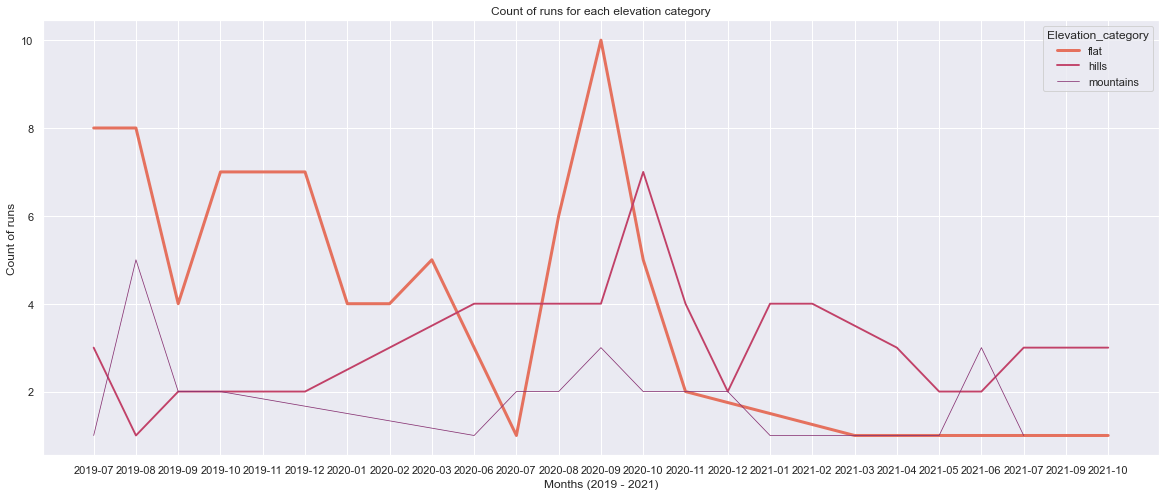

In [52]:
fig,ax = plt.subplots(figsize=(20,8))
sns.lineplot(x="Year_month", y="Avg_tempo_in_seconds", data=df_elev_gain_group, hue = 'Elevation_category', size = 'Elevation_category',
                 palette="flare", ax=ax)
ax.set(xlabel = 'Months (2019 - 2021)', ylabel = 'Count of runs', title = "Count of runs for each elevation category")
plt.show

<br>In the 2020-06 there's a growth in my hilly runs. That's the time I moved to the hilly area. But we can observe also a significant change in the numbers of flat runs. At that time, I started to train with running group in the city. We were training mostly at the treadmill - therfore flat runs go up. At the end of 2020, I stoped running with group and ran only around my house. That's why hilly runs go up again. <br>

Let's now take a look at total distance for each month.

In [53]:
df_distance = df_all[['Year_month', 'Distance']]
df_distance_group = df_distance.groupby(['Year_month',], as_index = False).sum()

<function matplotlib.pyplot.show(close=None, block=None)>

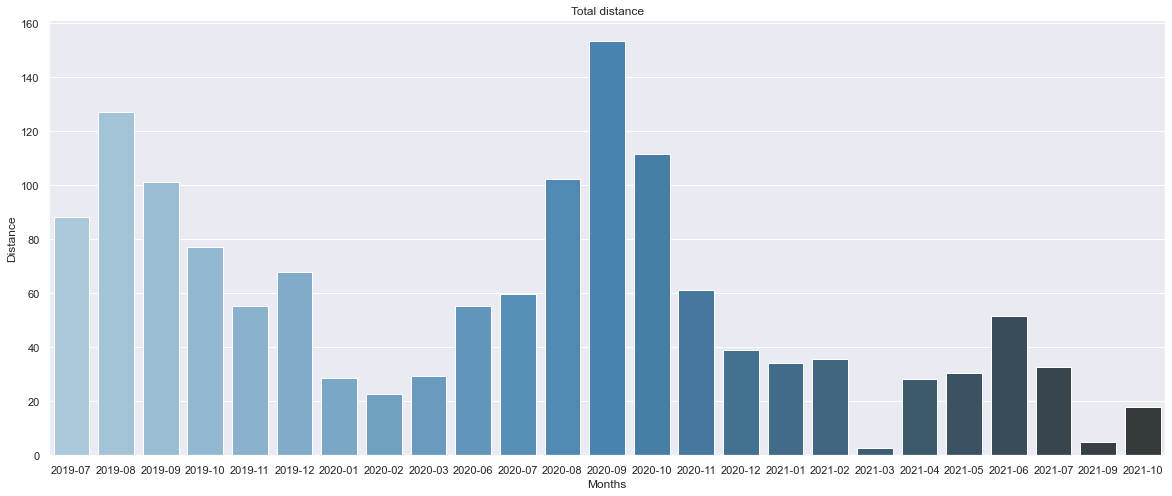

In [54]:
fig,ax = plt.subplots(figsize=(20,8))
sns.barplot(x="Year_month", y="Distance", data=df_distance_group,
                 palette="Blues_d", ax=ax)
ax.set(xlabel = 'Months', ylabel = 'Distance', title = "Total distance")
plt.show

Above chart shows that I'm very sesonal runner. Let's check what were my scores on the coldest day.

In [55]:
coldest_day = df_all[df_all.Temp_avg == df_all.Temp_avg.min()]

In [56]:
coldest_day

,Date,Distance,Avg_running_rythm,Elevation_gain,Moving_time_in_seconds,Elapsed_time_in_seconds,Avg_tempo_in_seconds,Rest_time_in_seconds,Rest_percentage,Distance_category,Elevation_category,Year,Month,Year_month,Temp_avg
25,2021-02-13,7.29,167.0,156.0,2363.0,3027.0,324.14,664.0,21.94,short,hills,2021,2,2021-02,-8.0


2021-02-13 the temperature reached -8 degrees. I ran 7,29 km that day with scores as below.

In [57]:
print('Average tempo: ' + seconds_to_timedelta(324.14) + '\n'
      'Elapsed time: ' + seconds_to_timedelta(3027.0) + '\n'
      'Moving time: ' + seconds_to_timedelta(2363.0) + '\n'
      'Rest time: ' + seconds_to_timedelta(664.0) + '\n')

Average tempo: 05:24
Elapsed time: 50:27
Moving time: 39:23
Rest time: 11:04



Finaly, let's check how average tempo and elevation gain are related to the distance. They might be the crucial features for the model. I will also check if Resttime_in_seconds and Avg_running_rythm are correlated with distance.

<function matplotlib.pyplot.show(close=None, block=None)>

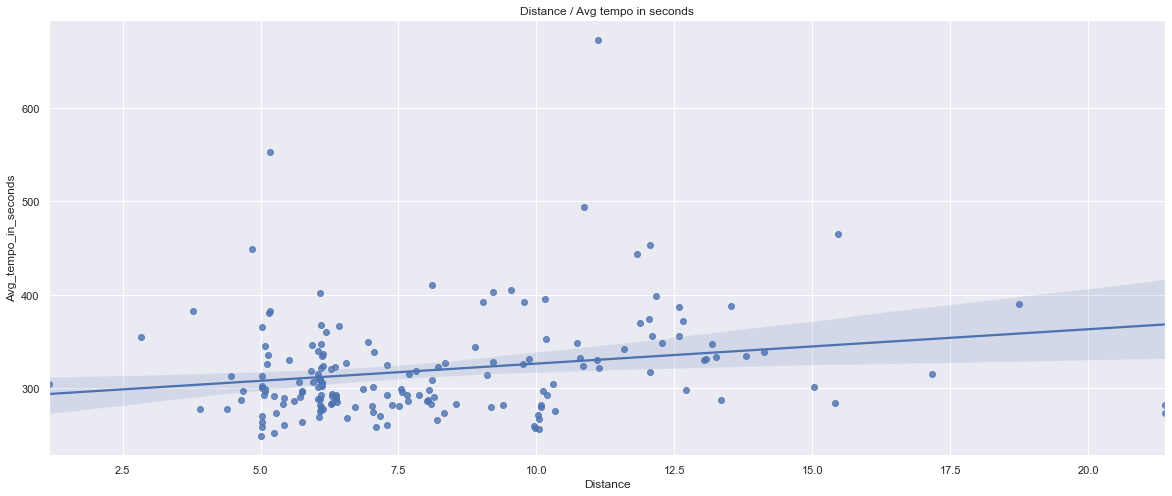

In [58]:
# distance / avg tempo

fig,ax = plt.subplots(figsize=(20,8))
sns.regplot(x="Distance", y="Avg_tempo_in_seconds", data=df_all)
ax.set(xlabel = 'Distance', ylabel = 'Avg_tempo_in_seconds', title = "Distance / Avg tempo in seconds")
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

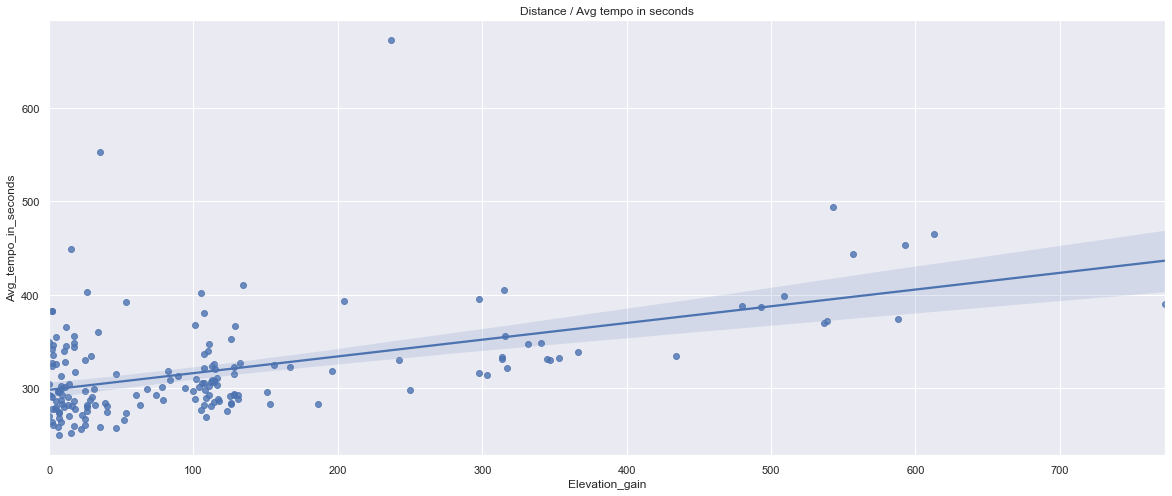

In [59]:
# elevation gain / avg tempo

fig,ax = plt.subplots(figsize=(20,8))
sns.regplot(x="Elevation_gain", y="Avg_tempo_in_seconds", data=df_all)
ax.set(xlabel = 'Elevation_gain', ylabel = 'Avg_tempo_in_seconds', title = "Distance / Avg tempo in seconds")
plt.show

In [60]:
df_all[['Distance', 'Elevation_gain', 'Avg_tempo_in_seconds']].corr()

,Distance,Elevation_gain,Avg_tempo_in_seconds
Distance,1.00,0.54,0.22
Elevation_gain,0.54,1.00,0.49
Avg_tempo_in_seconds,0.22,0.49,1.00


<AxesSubplot:xlabel='Distance', ylabel='Rest_time_in_seconds'>

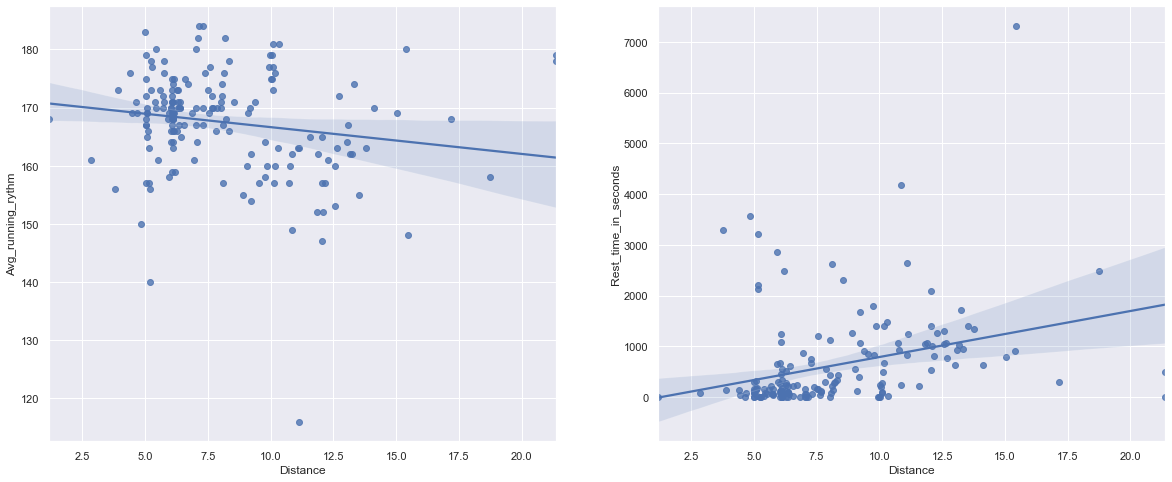

In [61]:
fig, axs = plt.subplots(ncols=2, figsize=(20,8))

sns.regplot(x="Distance", y="Avg_running_rythm", data=df_all, ax=axs[0])
sns.regplot(x="Distance", y="Rest_time_in_seconds", data=df_all, ax=axs[1])
#ax.set(xlabel = 'Distance', ylabel = 'Avg_tempo_in_seconds', title = "Distance / Avg tempo in seconds")

In [62]:
df_all[['Distance', 'Avg_running_rythm', 'Rest_time_in_seconds']].corr()

,Distance,Avg_running_rythm,Rest_time_in_seconds
Distance,1.00,-0.17,0.32
Avg_running_rythm,-0.17,1.00,-0.64
Rest_time_in_seconds,0.32,-0.64,1.00


Lets check how other features are correlated with each othre and start prepering the prediction model.

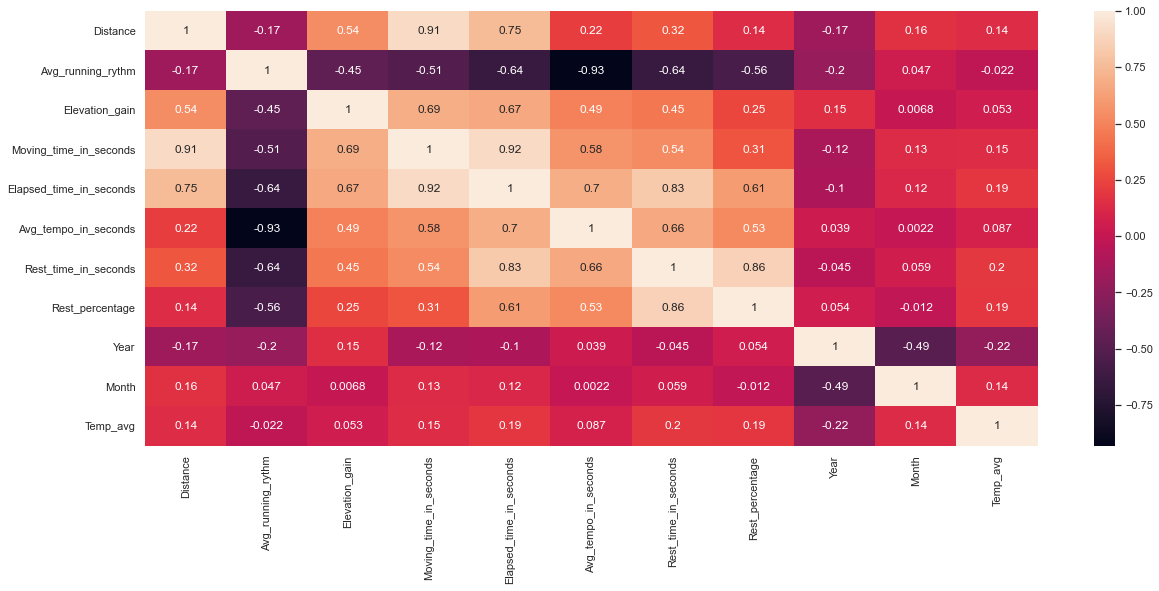

In [63]:
fig = plt.subplots(figsize=(20,8))
sns.heatmap(df_all.corr(), annot = True)
plt.show()

# ✔️ Building predictive models

My target variable will be average tempo in seconds. I've decided to build the model based on two features - elevation gain and distance, as they seem to be the most relevant when it comes to the final average tempo. 

I will build a multiple linear regression model, Decision Tree Regressorand Random Forrest Regressor models with Scikit Learn's Pipeline and StandardScaler objects. 

<b>Models evaluation</b></br>
I will evalute models using two measures that are often used in statistic.<br>
<ul>
    <li><b>R^2 / R-squared</b> - it's a measure which indicates how close the data is to the fitted regression line. The value of R-squared is the percentage of variation of the response variable (y) that is explained by a linear model. R-squared = 50% means that half of the data has been covered (or predicted correctly) with linear regression. </li>
</ul>
<ul>
    <li><b>Mean Squarred Error (MSE)</b> - it measures the average of the squares of errors which is the difference between actual value and the estimated one. The larger the number the larger the error . MSE of 0.0 indicates perfect agreement</li>
</ul>
<ul>
    <li><b>Root Mean Squarred Error (RMSE)</b> - it is the standard deviation of the residuals - predictions errors. It measures how spread out these residuals are around line of best fit. The lower RMSE, the better score. </li>
</ul><br>

Below function will help in getting scores printed and creating distribution plot showing how excatly regression line fits the real values.

In [64]:
def evaluate(model_name, true, predicted):
    
    #calculating MSE
    mse = metrics.mean_squared_error(true, predicted)
    
    #calculating RMSE
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    
    #calculating R^2
    r2 = metrics.r2_score(true, predicted)
    
    #plot
    plt.figure(figsize=(10, 7))
    ax1 = sns.distplot(true, hist=False, color='seagreen', label = 'True values')
    sns.distplot(predicted, hist=False, color = 'maroon', label = 'Predicted values', ax = ax1)
    plt.title('Real and predicted values for Average tempo')
    plt.xlabel('Average tempo in seconds')
    plt.ylabel('Features')
    plt.legend(['Real', 'Predicted'])
    plt.show()
    
    #print scores
    print(model_name,"'s evaluation: ")
    print('_______________________')
    print('MSE: ', mse)
    print('_______________________')
    print('RMSE: ', rmse)   
    print('_______________________')
    print('R-squared: ', r2)
    print('_______________________')

### Import libraries

In [65]:
# Linear regression model
from sklearn.linear_model import LinearRegression

# To split data into training and test sets
from sklearn.model_selection import train_test_split

# StandardScaler used for data normalization
from sklearn.preprocessing import StandardScaler

# Metrics used for outcome validation
from sklearn import metrics

# I will use stats's zscore method to remove outliers from the final DataFrame
from scipy import stats

# Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor

# Cross validation model
from sklearn.model_selection import cross_val_score

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

#GridSearchCV used for fine-tuning
from sklearn.model_selection import GridSearchCV

### Train Test Split

Let's first create our features togheter with target variable and split them into two sets - training and test. Before that I will remove outliers  (bigger than 3 times standard deviation for each column) using zscore methode from stats library.

In [66]:
df_model = df_all[['Elevation_gain', 'Distance', 'Avg_tempo_in_seconds']]

# removing ourliers
df_model = df_model[(np.abs(stats.zscore(df_model)) < 3).all(axis=1)]

X = df_model[['Elevation_gain', 'Distance']] 
y = df_model['Avg_tempo_in_seconds']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [67]:
X_train.shape

(116, 2)

In [68]:
print('Shape of X_train set is: ', X_train.shape)
print('Shape of y_train set is: ', y_train.shape)
print('Shape of X_test set is: ', X_test.shape)
print('Shape of y_test set is: ', y_test.shape)

Shape of X_train set is:  (116, 2)
Shape of y_train set is:  (116,)
Shape of X_test set is:  (50, 2)
Shape of y_test set is:  (50,)


### 📈 Multiple Linear Regression

I will first normalize the data using StandardScaler and transform the X_train data.

In [69]:
scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)


In [70]:
lin_reg = LinearRegression(normalize = True) #normalize parameter is set to True as I already scaled the input with StandardScaler
lin_reg.fit(X_train_scal, y_train)

LinearRegression(normalize=True)

The model is created. Let's evalute it using samples from our training set.

In [71]:
X_train_scal_sample = X_train_scal[0:5]
y_train_sample = y_train[0:5]
pred = lin_reg.predict(X_train_scal_sample)

In [72]:
print(list(pred))
print(list(y_train_sample))

[314.71214919215913, 306.0311024386731, 295.6944024972772, 296.86401181949276, 339.9232407120852]
[308.7171052631579, 287.06467661691545, 281.3261163734777, 292.11045364891515, 355.48489666136726]


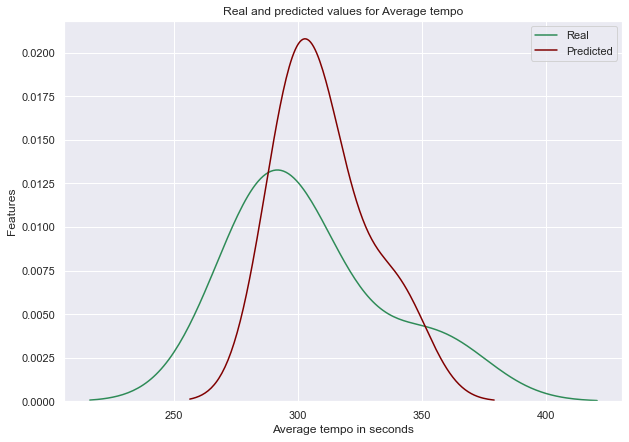

Multiple Linear Regression 's evaluation: 
_______________________
MSE:  173.37499149262993
_______________________
RMSE:  13.167193759211942
_______________________
R-squared:  0.7599211734399672
_______________________


In [73]:
evaluate('Multiple Linear Regression', y_train_sample, pred)

The sample set received quite ok resaults. R-squated says that 75% of data has been covered with linear regression and the typical prediction error  = 13 sec. (RMSE, interpretable in target variable's units)

Lets check how the model evaluates on the whole training set.

In [74]:
lin_reg_pred = lin_reg.predict(X_train_scal)

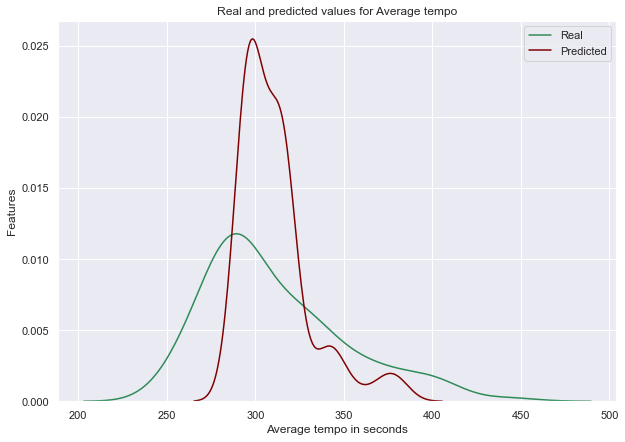

Multiple Linear Regression 's evaluation: 
_______________________
MSE:  1159.3729627961259
_______________________
RMSE:  34.049566264434645
_______________________
R-squared:  0.25683422062662786
_______________________


In [75]:
 evaluate('Multiple Linear Regression', y_train, lin_reg_pred)

Unfortunately, here the score is much worse. Both R-squared and RMSE changed drasticaly. Let's train another model.

### 📈 Decision Tree Regressor

In [76]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_scal, y_train)

DecisionTreeRegressor()

In [77]:
tree_pred = tree_reg.predict(X_train_scal)

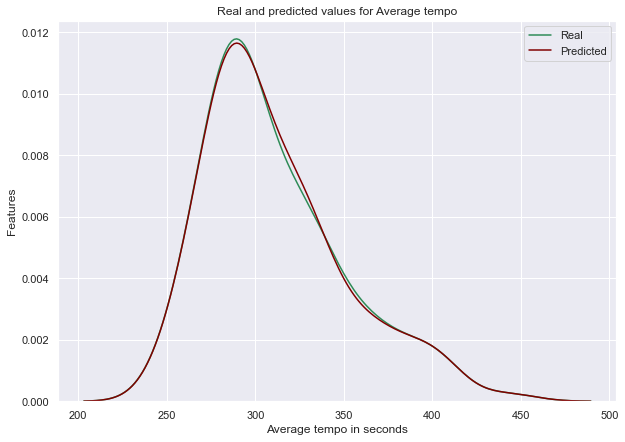

Decision Tree Regressor 's evaluation: 
_______________________
MSE:  12.614795800164941
_______________________
RMSE:  3.551731380631838
_______________________
R-squared:  0.9919138319994495
_______________________


In [78]:
evaluate('Decision Tree Regressor', y_train, tree_pred)

It looks like a perfect model but that definitely cannot be true. It's much more likely that the model is overfitting. Let's check it using cross-validation feature provided by Scikit-Learn. It will split our training set into 10 unique subsets, then train it and evaluate. The result will be a list of 10 minus mean squared error which I will convert into list of RMSEs.

In [79]:
# calculating scores

scores = cross_val_score(tree_reg, X_train_scal, y_train,
                        scoring='neg_mean_squared_error', cv=10)

tree_reg_score = np.sqrt(-scores)

In [80]:
# function to show scores for cross validation model

def print_scores(scores):
    print('_______________________')
    print('Scores list: ', scores)
    print('_______________________')
    print('Scores mean: ', scores.mean())
    print('_______________________')
    print('Scores std: ', scores.std())

In [81]:
print_scores(tree_reg_score)

_______________________
Scores list:  [45.07309838 52.58918002 45.7949078  40.65681293 50.30798426 56.07185193
 30.89185479 71.13693637 54.36477114 52.27747692]
_______________________
Scores mean:  49.91648745372612
_______________________
Scores std:  10.04479006810052


We can clearly see now that the Decision Tree model is far from being perfect. In fact is worse than the Linear Regression model where RMSE was around 34. Let's check its scores using cross validation.

In [82]:
lin_reg_scores = cross_val_score(lin_reg, X_train_scal, y_train,
                        scoring='neg_mean_squared_error', cv=10)

lin_reg_score_rmse = np.sqrt(-lin_reg_scores)

In [83]:
print_scores(lin_reg_score_rmse)

_______________________
Scores list:  [15.98360314 35.21851002 38.53627485 23.45005979 30.98647288 46.4204818
 33.71016881 46.58287128 30.55749933 33.93009228]
_______________________
Scores mean:  33.53760341849929
_______________________
Scores std:  8.885011581216881


Let's try another one model - Random Forest Regressor. 

### 📈 Random Forest Regressor

That's how Scikit Learn documentation describes it.
> A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [84]:
# creating and fitting the model

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_scal, y_train)

RandomForestRegressor()

In [85]:
# cross validating

forest_reg_scores = cross_val_score(forest_reg, X_train_scal, y_train,
                        scoring='neg_mean_squared_error', cv=10)

forest_reg_score_rmse = np.sqrt(-forest_reg_scores)

In [86]:
print_scores(forest_reg_score_rmse)

_______________________
Scores list:  [20.22930792 41.82927156 42.7663547  21.60749732 36.11180924 48.85542148
 29.08356378 56.60985426 40.34417825 38.14903324]
_______________________
Scores mean:  37.558629174564544
_______________________
Scores std:  10.82911515221822


So far, it seems that Linear Regression model performs best. But since Random Forest Regressor is second in line, I will try to fine-tune it using Grid Search and see if it can achive beter scores. 

In [87]:
# defining which hyperparameters combination should be tested

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [88]:
# creating a new RFR model
forest_reg_grid = RandomForestRegressor() 

In [89]:
# creating a Grid Search model and fitting it with our training data
grid_search = GridSearchCV(forest_reg_grid, param_grid, cv = 5,
                          scoring='neg_mean_squared_error',
                          return_train_score = True)

grid_search.fit(X_train_scal, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [90]:
# Let's check what are the best parameters for our model

grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [91]:
#Let's also check what other parameters looked like

grid_result = grid_search.cv_results_
for mean_score, params in zip(grid_result["mean_test_score"], grid_result["params"]):
    print(np.sqrt(-mean_score), params)

41.180618399005766 {'max_features': 2, 'n_estimators': 3}
39.283330205063805 {'max_features': 2, 'n_estimators': 10}
38.67307852333548 {'max_features': 2, 'n_estimators': 30}
nan {'max_features': 4, 'n_estimators': 3}
nan {'max_features': 4, 'n_estimators': 10}
nan {'max_features': 4, 'n_estimators': 30}
nan {'max_features': 6, 'n_estimators': 3}
nan {'max_features': 6, 'n_estimators': 10}
nan {'max_features': 6, 'n_estimators': 30}
nan {'max_features': 8, 'n_estimators': 3}
nan {'max_features': 8, 'n_estimators': 10}
nan {'max_features': 8, 'n_estimators': 30}
46.97843841804693 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
46.37257582983534 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
nan {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
nan {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
nan {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
nan {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


Unfortunately, RMSE hasn't improved significantly. Linear regression model still has the best scores. But to be sure, I will compare it with the Random Forest model on the test data.

### 📈 Test set evaluation

In [92]:
# Let's first transform the test dataset using Standard Scaler

X_test_scal = scaler.transform(X_test)

In [93]:
# using .best_estimator_ attributes grom my Grid Search, I will get already fitted model using best parameters ( {'max_features': 2, 'n_estimators': 30} )
grid_model = grid_search.best_estimator_

In [94]:
# predictions
lin_reg_final_prediction = lin_reg.predict(X_test_scal)
grid_model_final_prediction = grid_model.predict(X_test_scal)

In [95]:
# Let's chceck the final scores

lin_reg_final_mse = metrics.mean_squared_error(y_test, lin_reg_final_prediction)
lin_reg_final_rmse = np.sqrt(lin_reg_final_mse)
forest_final_mse = metrics.mean_squared_error(y_test, grid_model_final_prediction)
forest_final_rmse = np.sqrt(forest_final_mse)

# and print them
print('-------------------------------')
print('Final MSE for Linear Regression model = ', lin_reg_final_mse)
print('Final RMSE for Linear Regression model = ', lin_reg_final_rmse)
print('-------------------------------')
print('Final MSE for Random Forest Regressor model = ', forest_final_mse)
print('Final RMSE for Random Forest Regressor model = ', forest_final_rmse)

-------------------------------
Final MSE for Linear Regression model =  1355.7023873596377
Final RMSE for Linear Regression model =  36.81986403233501
-------------------------------
Final MSE for Random Forest Regressor model =  1807.723771595587
Final RMSE for Random Forest Regressor model =  42.51733495405829


# ✔️ Conclusions

The predictive models are not the best. But, to be honest, it's not that supprising for me. As it was presented in the EDA section, the average tempo can vary significantly even though the distance and elevation gain are the same. Models are based on the data from the past two years and during that time, many factors that have impact on my results, have changed. My condition was changing, my motivation and weather conditions. And because of that it's hard to be precise in that kind of prediction. I'm sure that with additional information like condition state or motivation level for the given day (that would be measurable), I would be able to create much more efficient predictive models. 

# 🔗 References:
- [My LinkedIn profile](https://www.linkedin.com/in/grzegorz-kosek)
- [Linear Regression for Machine Learning by Jason Brownlee PhD](https://machinelearningmastery.com/linear-regression-for-machine-learning/)